<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    result = np.zeros_like(X[0] @ V[0])

    for mat, vec in zip(X, V):
        result += mat @ vec

    return result

#Тесты
X1 = [np.array([[1, 2], [3, 4]])]
V1 = [np.array([[1], [2]])]
expected1 = np.array([[5], [11]])
if not np.allclose(sum_prod(X1, V1), expected1):
    print("Test 1 failed")

X2 = [np.eye(2), np.eye(2)]
V2 = [np.array([[1], [2]]), np.array([[3], [4]])]
expected2 = np.array([[4], [6]])
if not np.allclose(sum_prod(X2, V2), expected2):
    print("Test 2 failed")

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(np.int8)

#Тесты
M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
expected1 = np.array([[0, 1], [0, 1]])
if not np.array_equal(binarize(M1), expected1):
    print("Test 1 failed")

M2 = np.array([[0.1, 0.6], [0.4, 0.9]])
expected2 = np.array([[0, 0], [0, 1]])
if not np.array_equal(binarize(M2, threshold=0.7), expected2):
    print("Test 2 failed")

M3 = np.array([[0.8, 0.9], [0.85, 0.95]])
expected3 = np.array([[1, 1], [1, 1]])
if not np.array_equal(binarize(M3, threshold=0.5), expected3):
    print("Test 3 failed")

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]


def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

#Тесты
mat1 = np.array([[1, 2, 3],
                 [2, 2, 2],
                 [1, 1, 2]])
row_result = unique_rows(mat1)
expected_row = [np.array([1, 2, 3]), np.array([2]), np.array([1, 2])]
if not all(np.array_equal(a, b) for a, b in zip(row_result, expected_row)):
    print("Test 1 failed")

col_result = unique_columns(mat1)
expected_col = [np.array([1, 2]), np.array([1, 2]), np.array([2, 3])]
if not all(np.array_equal(a, b) for a, b in zip(col_result, expected_col)):
    print("Test 2 failed")

mat2 = np.array([[1, 1, 1],
                 [2, 2, 2],
                 [3, 3, 3]])
row_result = unique_rows(mat2)
expected_row = [np.array([1]), np.array([2]), np.array([3])]
if not all(np.array_equal(a, b) for a, b in zip(row_result, expected_row)):
    print("Test 3 failed")

col_result = unique_columns(mat2)
expected_col = [np.array([1, 2, 3]), np.array([1, 2, 3]), np.array([1, 2, 3])]
if not all(np.array_equal(a, b) for a, b in zip(col_result, expected_col)):
    print("Test 4 failed")

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

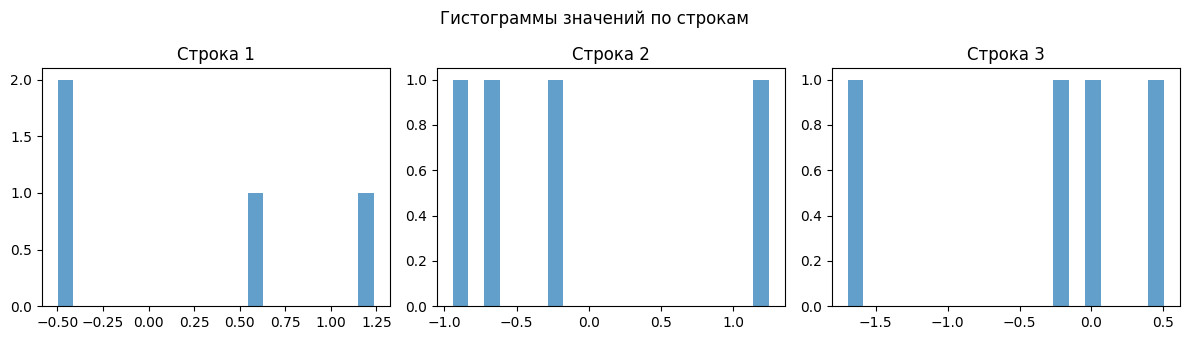

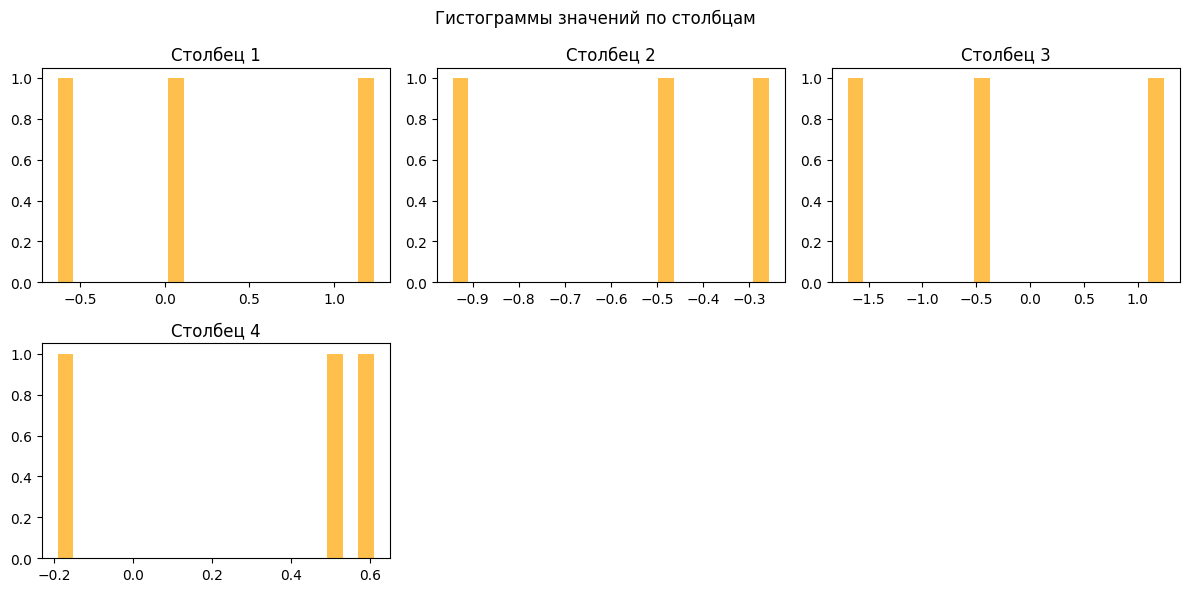

{'matrix': array([[ 1.23780282, -0.46326053, -0.49957936,  0.61103638],
        [-0.63385794, -0.94353666,  1.24758846, -0.19201302],
        [ 0.05123895, -0.2573281 , -1.69635269,  0.50648082]]),
 'row_means': array([ 0.22149983, -0.13045479, -0.34899026]),
 'row_vars': array([0.54336561, 0.70432737, 0.67895042]),
 'col_means': array([ 0.21839461, -0.55470843, -0.31611453,  0.30850139]),
 'col_vars': array([0.59782284, 0.08266172, 1.46129459, 0.12707932])}

In [5]:
def task4(m, n, mu=0, sigma=1):
    matrix = np.random.normal(loc=mu, scale=sigma, size=(m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)

    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    plt.figure(figsize=(12, 6))
    plt.suptitle('Гистограммы значений по строкам')
    for i in range(min(m, 5)):
        plt.subplot(2, 3, i + 1)
        plt.hist(matrix[i, :], bins=20, alpha=0.7)
        plt.title(f'Строка {i + 1}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.suptitle('Гистограммы значений по столбцам')
    for j in range(min(n, 5)):
        plt.subplot(2, 3, j + 1)
        plt.hist(matrix[:, j], bins=20, alpha=0.7, color='orange')
        plt.title(f'Столбец {j + 1}')
    plt.tight_layout()
    plt.show()

    return {
        'matrix': matrix,
        'row_means': row_means,
        'row_vars': row_vars,
        'col_means': col_means,
        'col_vars': col_vars
    }

task4(3, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    mat = np.empty((m, n), dtype=type(a))
    for i in range(m):
        for j in range(n):
            mat[i, j] = a if (i + j) % 2 == 0 else b
    return mat

#Тесты
expected1 = np.array([[0, 1], [1, 0]])
if not np.array_equal(chess(2, 2, 0, 1), expected1):
    print("Test 1 failed")

expected2 = np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
if not np.array_equal(chess(3, 3, 1, 2), expected2):
    print("Test 2 failed")

expected3 = np.array([[5, 10, 5, 10], [10, 5, 10, 5]])
if not np.array_equal(chess(2, 4, 5, 10), expected3):
    print("Test 3 failed")

expected4 = np.array([['a', 'b'], ['b', 'a']])
if not np.array_equal(chess(2, 2, 'a', 'b'), expected4):
    print("Test 4 failed")

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

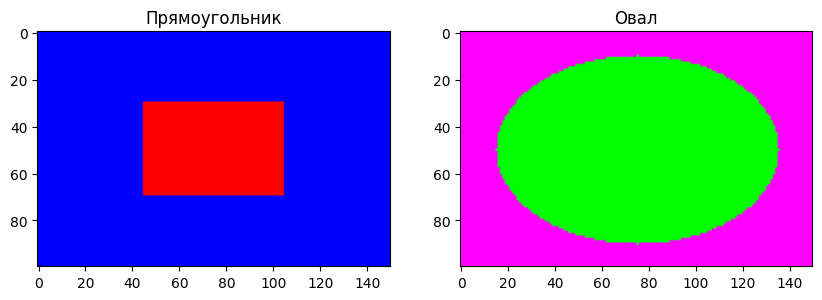

In [7]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color

    x_center, y_center = n // 2, m // 2

    x_start = max(0, x_center - a // 2)
    x_end = min(n, x_center + a // 2 + a % 2)
    y_start = max(0, y_center - b // 2)
    y_end = min(m, y_center + b // 2 + b % 2)

    image[y_start:y_end, x_start:x_end] = rectangle_color

    return image


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color

    x0, y0 = n // 2, m // 2

    x = np.arange(n)
    y = np.arange(m)
    xx, yy = np.meshgrid(x, y)

    ellipse = ((xx - x0) ** 2 / a ** 2 + (yy - y0) ** 2 / b ** 2) <= 1

    image[ellipse] = ellipse_color

    return image

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(draw_rectangle(60, 40, 100, 150, (255, 0, 0), (0, 0, 255)))
plt.title("Прямоугольник")

plt.subplot(1, 2, 2)
plt.imshow(draw_ellipse(60, 40, 100, 150, (0, 255, 0), (255, 0, 255)))
plt.title("Овал")

plt.show()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [12]:
def task7(series, p):
    series = np.asarray(series)
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)

    local_max = []
    local_min = []
    for i in range(1, len(series) - 1):
        if series[i - 1] < series[i] > series[i + 1]:
            local_max.append(i)
        elif series[i - 1] > series[i] < series[i + 1]:
            local_min.append(i)

    moving_avg = np.convolve(series, np.ones(p) / p, mode='valid')

    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': np.array(local_max),
        'local_minima': np.array(local_min),
        'moving_average': moving_avg
    }

series = [1, 2, 3, 2, 1, 2, 3, 4, 3, 2]
task7(series, 3)

{'mean': np.float64(2.3),
 'variance': np.float64(0.8099999999999999),
 'std': np.float64(0.9),
 'local_maxima': array([2, 7]),
 'local_minima': array([4]),
 'moving_average': array([2.        , 2.33333333, 2.        , 1.66666667, 2.        ,
        3.        , 3.33333333, 3.        ])}

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [13]:
def one_hot_encoding(labels):
    labels = np.asarray(labels)
    n_classes = np.max(labels) + 1 if len(labels) > 0 else 0
    eye = np.eye(n_classes, dtype=int)
    return eye[labels]

labels1 = [0, 2, 3, 0]
one_hot_encoding(labels1)

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])